<a href="https://colab.research.google.com/github/ChahineBA/Hospitality-Employees-Time-Series-Prediction/blob/main/Hospitality_Employees_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("car")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Libraries Used:
library(readr)
library(tseries)
library(ggplot2)
library(lmtest)
library(stats)
library(stringr)
library(car)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData



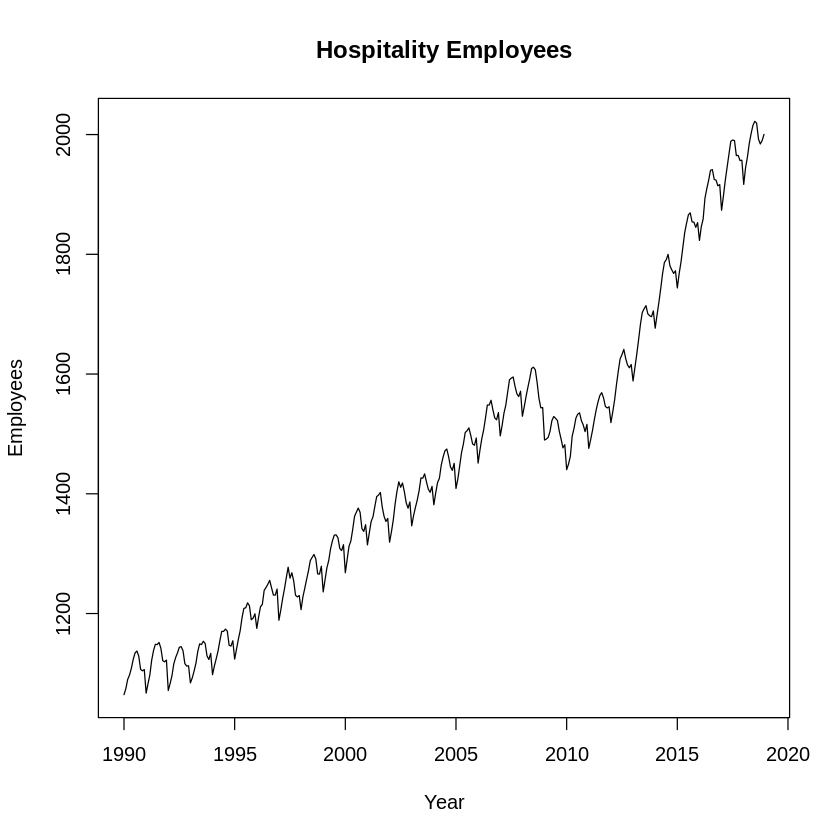

In [ ]:
# Load the dataset
mydata <- read.csv("/content/HospitalityEmployees.csv")

# Convert Date column to Date format
mydata$Date <- as.Date(mydata$Date, format = "%m/%d/%Y")

# Extract Year from Date
mydata$Year <- format(mydata$Date, "%Y")

# Create time series object
employees_ts <- ts(mydata$Employees, start = c(1990, 1), frequency = 12)

# Plot the time series
plot(employees_ts, main = "Hospitality Employees", ylab = "Employees", xlab = "Year")

In [ ]:
# Perform Levene's Test for homogeneity of variances
library(car)
leveneTest(employees_ts ~ Year, data = mydata)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,28,0.3668384,0.9988814
,319,NA,NA


Warning message in matrix(employees_dc$seasonal, nrow = 25, ncol = 12, byrow = TRUE):
“data length [348] is not a sub-multiple or multiple of the number of rows [25]”


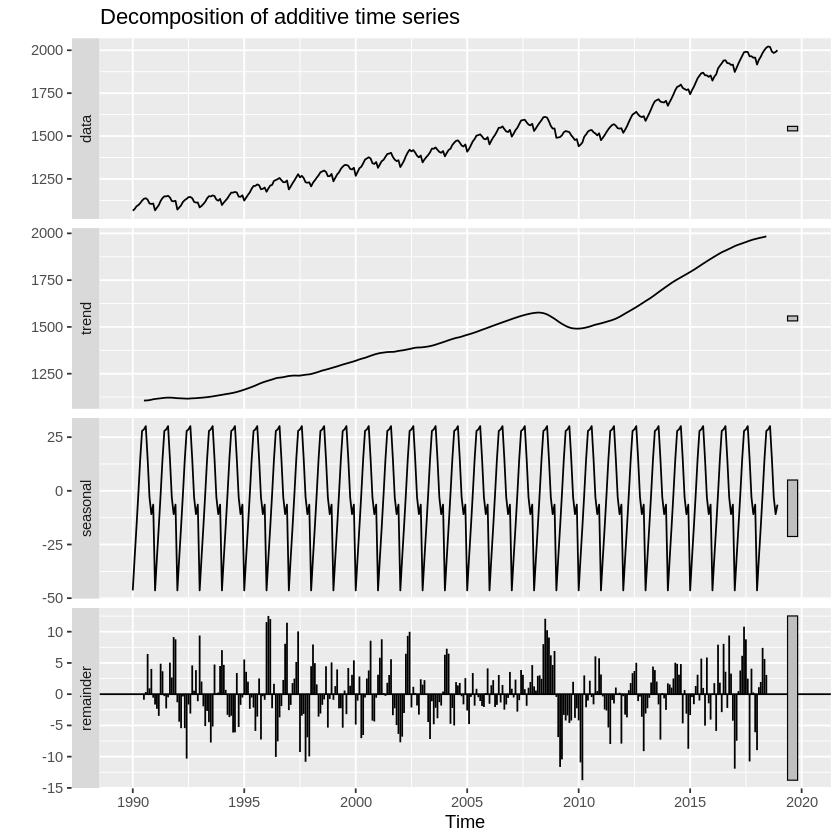

In [ ]:
# Perform time series decomposition

employees_dc <- decompose(employees_ts, type = "additive")

# Convert decomposed components to a data frame

season <- as.data.frame(matrix(employees_dc$seasonal,nrow=25,ncol=12,byrow=TRUE)[1:5,])

# Use autoplot to plot the decomposed components
colnames(season) <- c("January", "February", "March", "April", "May", "June",
                      "July", "August", "September", "October", "November", "December")

autoplot (employees_dc)

In [ ]:
season

January,February,March,April,May,June,July,August,September,October,November,December
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-46.36528,-31.25933,-16.77093,-1.465575,14.71047,27.88725,28.6121,30.13487,14.81374,-3.008433,-10.86126,-6.427629
-46.36528,-31.25933,-16.77093,-1.465575,14.71047,27.88725,28.6121,30.13487,14.81374,-3.008433,-10.86126,-6.427629
-46.36528,-31.25933,-16.77093,-1.465575,14.71047,27.88725,28.6121,30.13487,14.81374,-3.008433,-10.86126,-6.427629
-46.36528,-31.25933,-16.77093,-1.465575,14.71047,27.88725,28.6121,30.13487,14.81374,-3.008433,-10.86126,-6.427629
-46.36528,-31.25933,-16.77093,-1.465575,14.71047,27.88725,28.6121,30.13487,14.81374,-3.008433,-10.86126,-6.427629


In [ ]:
# Split the data into training and test sets
train_data <- window (employees_ts, start = c(1990, 1), end =c(2017, 12))
test_data <- window (employees_ts, start = c(2018, 1))

In [ ]:
#Simple exponential smoothing
employee_ses = ses(train_data,h=12)
summary(employee_ses)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = train_data, h = 12) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 1064.5327 

  sigma:  17.6451

     AIC     AICc      BIC 
3887.490 3887.562 3898.941 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 2.657014 17.59247 14.41753 0.1731545 1.030171 0.3771966 0.1374484

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018         1957.2 1934.587 1979.813 1922.616 1991.784
Feb 2018         1957.2 1925.222 1989.178 1908.294 2006.106
Mar 2018         1957.2 1918.036 1996.364 1897.303 2017.097
Apr 2018         1957.2 1911.977 2002.423 1888.038 2026.362
May 2018         1957.2 1906.640 2007.760 1879.875 2034.525
Jun 2018         1957.2 1901.814 2012.586 1872.495 2041.905
Jul 2018         1957.2 1897.377 2017.023 1865.708 2048.692
Aug 2018         1957.2 1893.246 2021.15

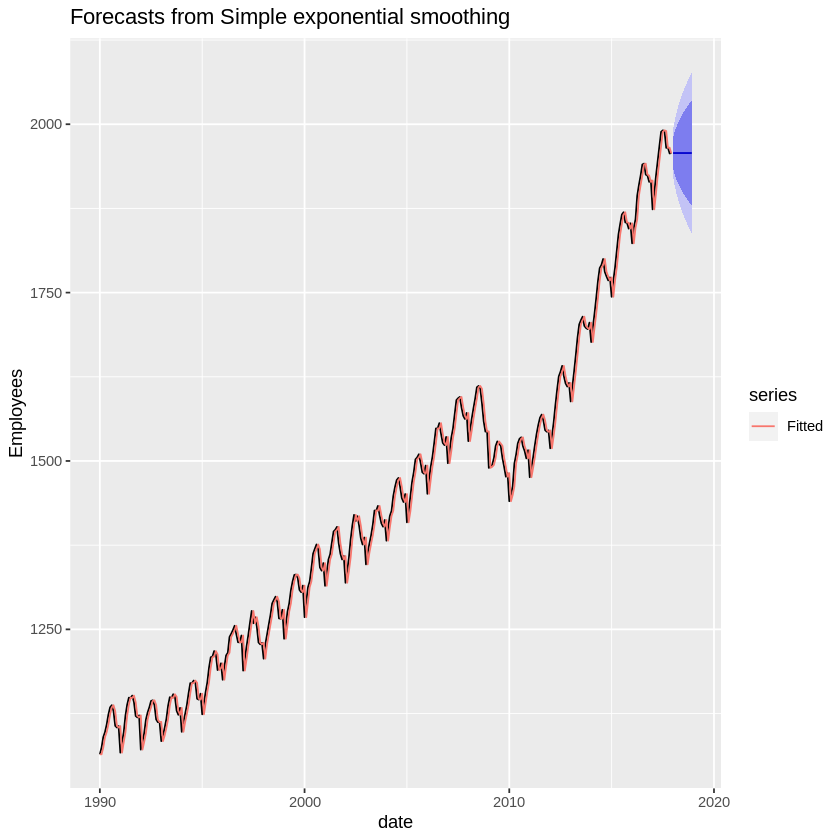

In [ ]:
autoplot (employee_ses) + autolayer (fitted (employee_ses), series="Fitted")+ ylab ("Employees") + xlab ("date")

In [ ]:
#Double Holt smoothing
employees_sh <- holt(train_data,h=12)
summary(employees_sh)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = train_data, h = 12) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 1087.821 
    b = 2.5928 

  sigma:  17.5532

     AIC     AICc      BIC 
3885.966 3886.148 3905.051 

Error measures:
                      ME     RMSE      MAE         MPE      MAPE      MASE
Training set 0.003847015 17.44844 13.88478 -0.01857856 0.9939415 0.3632587
                  ACF1
Training set 0.1348822

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       1959.793 1937.298 1982.288 1925.389 1994.197
Feb 2018       1962.386 1930.573 1994.199 1913.732 2011.040
Mar 2018       1964.979 1926.014 2003.943 1905.388 2024.570
Apr 2018       1967.572 1922.578 2012.566 1898.759 2036.385
May 2018       1970.165 1919.857 2020.472 1893.226 2047.103
Jun 2018       1972.758 1917.646 2027.869 1888.472 2057.044
Jul 2018       1975.351 1915.820 2034.881 1884.307 2066.3

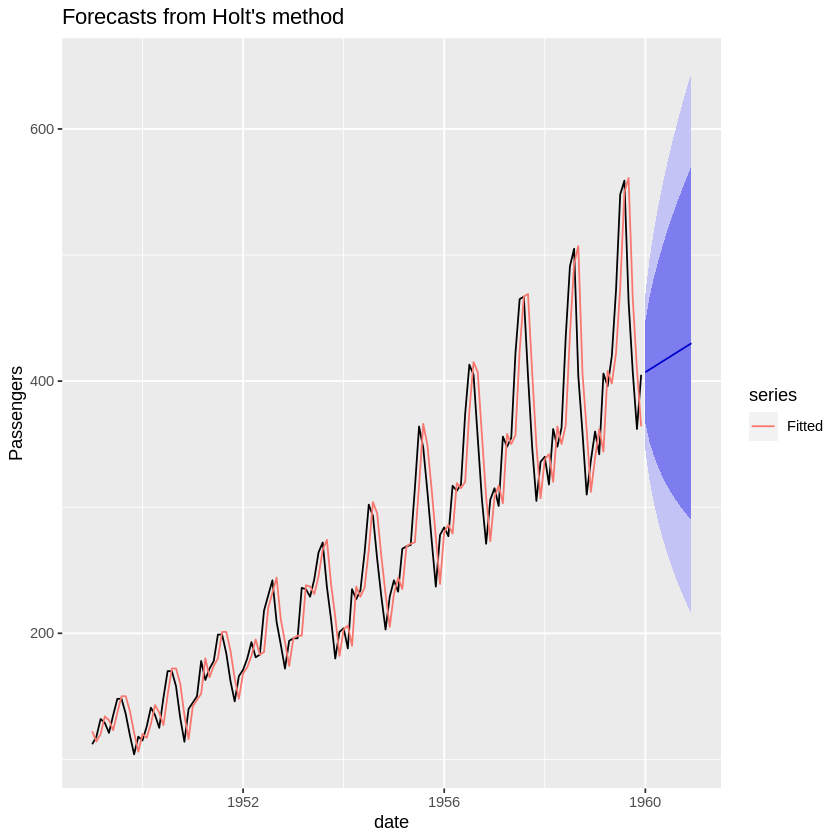

In [ ]:
autoplot (employees_sh) + autolayer (fitted (employees_sh), series="Fitted")+ ylab ("Employees") + xlab ("date")

In [ ]:
#Hold-Winters:
employees_hw <- hw(train_data,h=12,seasonal ="additive")
summary(employees_hw)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = train_data, h = 12, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.849 
    beta  = 0.1118 
    gamma = 0.0977 

  Initial states:
    l = 1104.2497 
    b = 2.4738 
    s = -6.7784 -12.3859 -4.426 17.7529 27.7736 27.0363
           27.48 15.3938 -2.2306 -16.0786 -27.6491 -45.888

  sigma:  5.6041

     AIC     AICc      BIC 
3130.350 3132.274 3195.240 

Error measures:
                     ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.01482519 5.469064 4.064304 0.001846618 0.291148 0.1063318
                     ACF1
Training set -0.002984294

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       1924.082 1916.900 1931.264 1913.098 1935.066
Feb 2018       1942.335 1932.375 1952.295 1927.103 1957.567
Mar 2018       1959.234 1946.643 1971.826 1939.977 1978.491
Apr 2018       1979.729 1964.533 1994.925 1956.

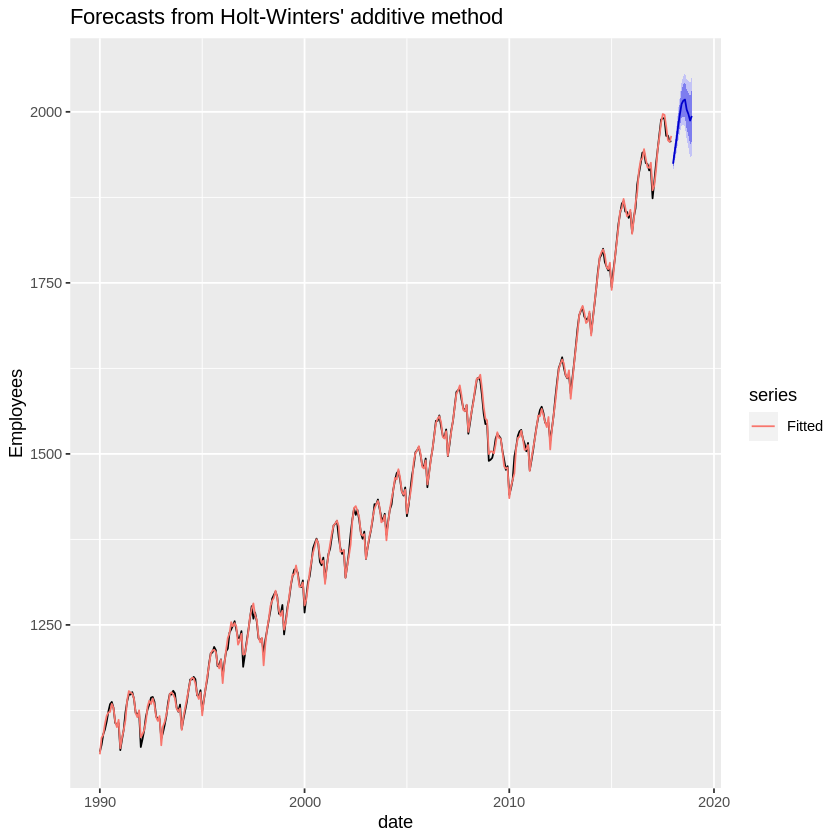

In [ ]:
autoplot (employees_hw) + autolayer (fitted (employees_hw), series="Fitted")+ ylab ("Employees") + xlab ("date")

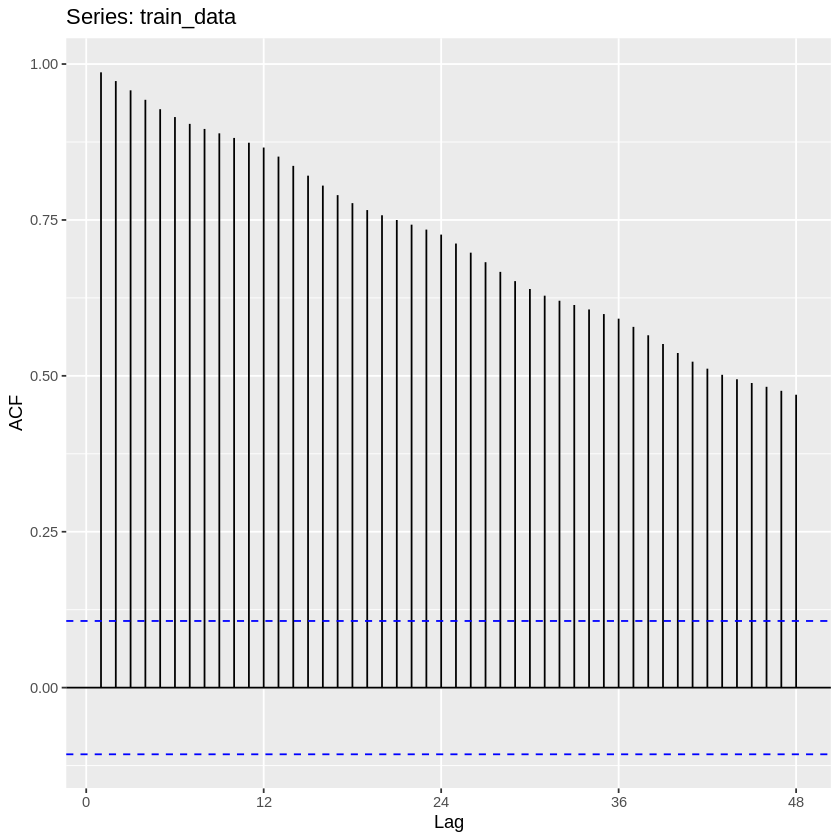

In [ ]:
#Verify the Trend of the Series
ggAcf(train_data,lag= 48)

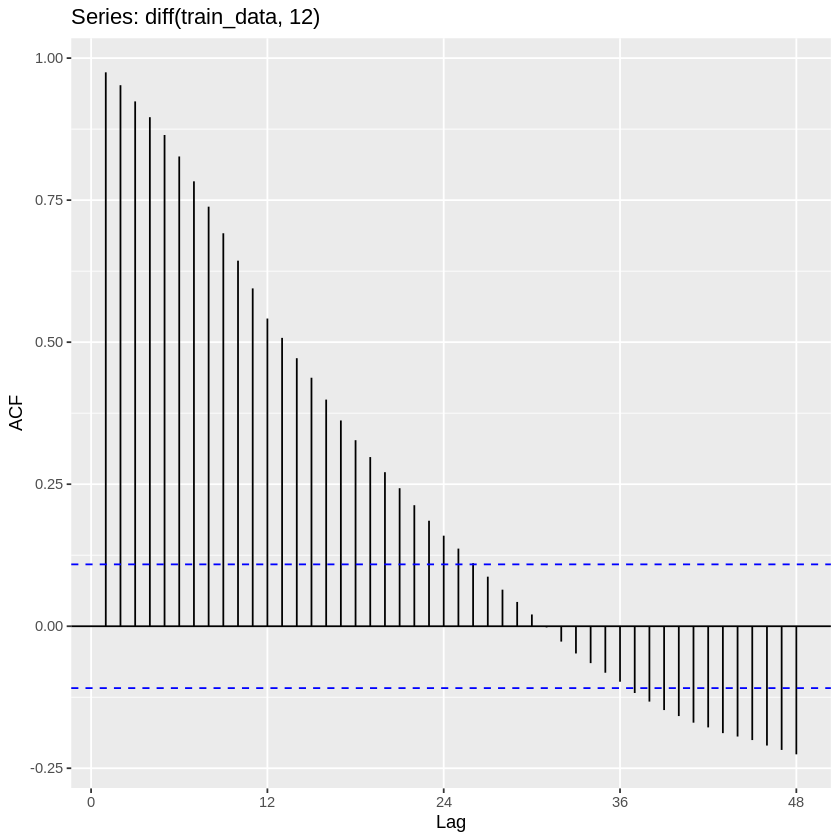

In [ ]:
ggAcf(diff(train_data,12),lag= 48)

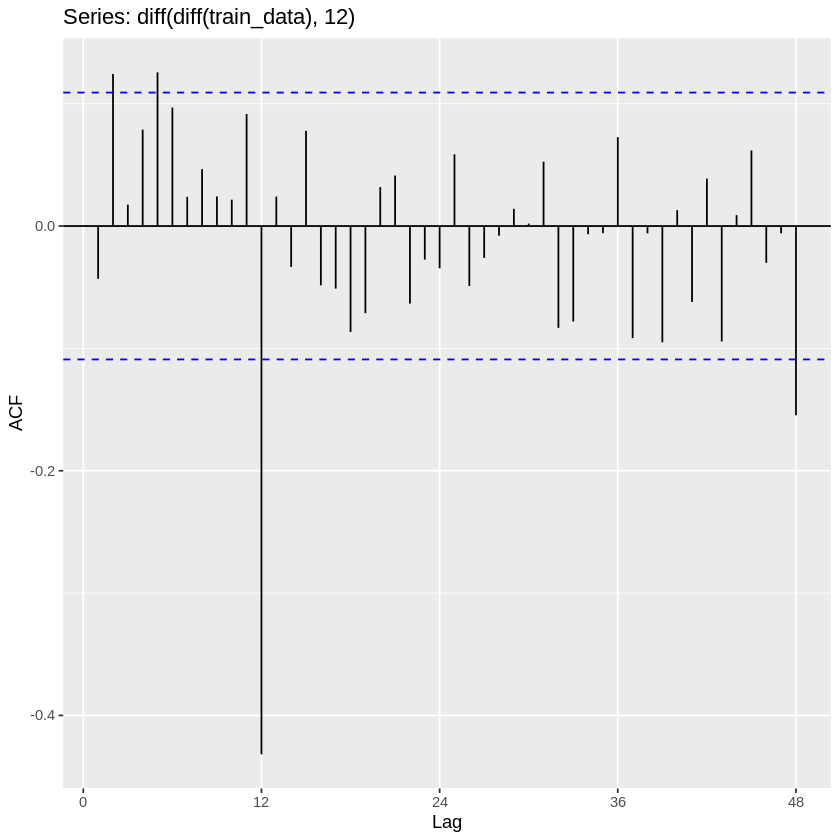

In [ ]:
ggAcf(diff(diff(train_data),12),lag= 48)

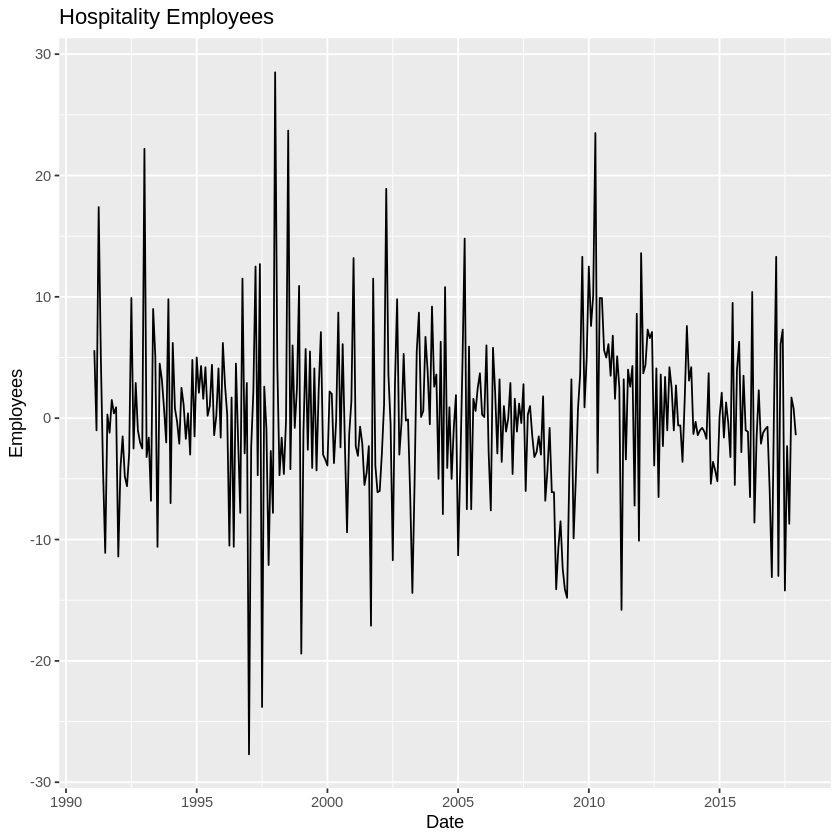

In [ ]:
autoplot(diff(diff(train_data),12)) + ggtitle("Hospitality Employees") + xlab("Date") + ylab("Employees")

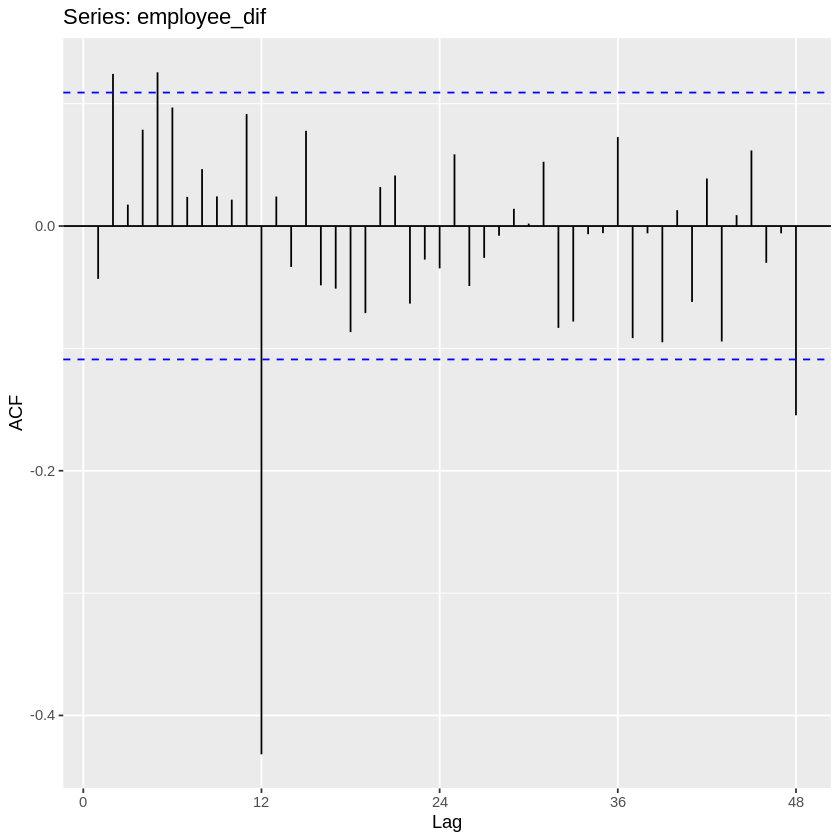

In [ ]:
#ACf
employee_dif <- diff(diff(train_data),12)
ggAcf(employee_dif,lag=48)

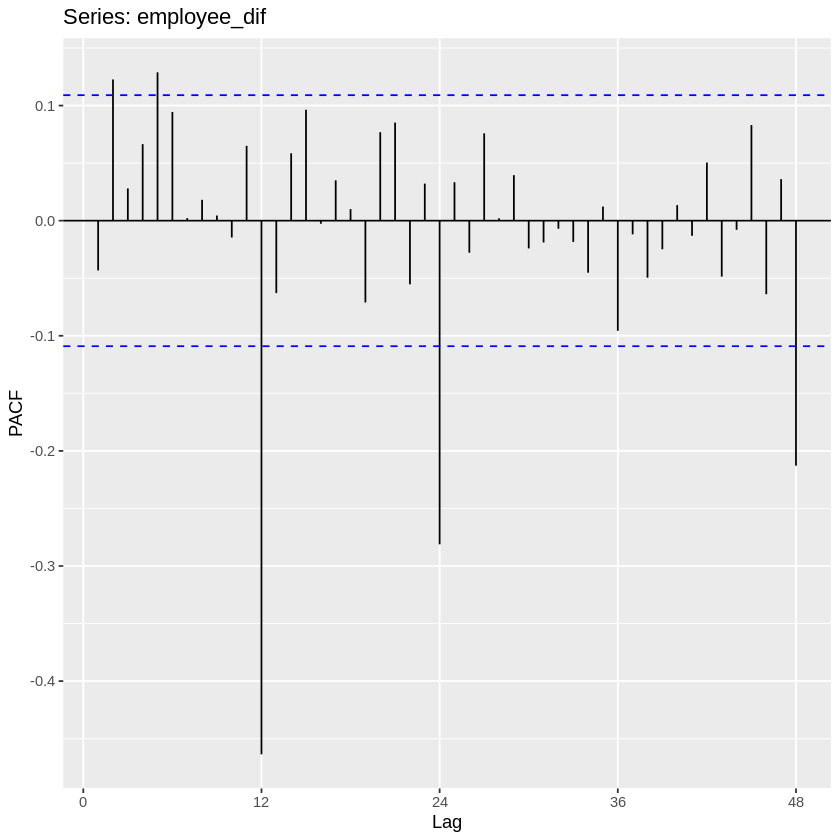

In [ ]:
#PACF:
ggPacf(employee_dif,lag=48)

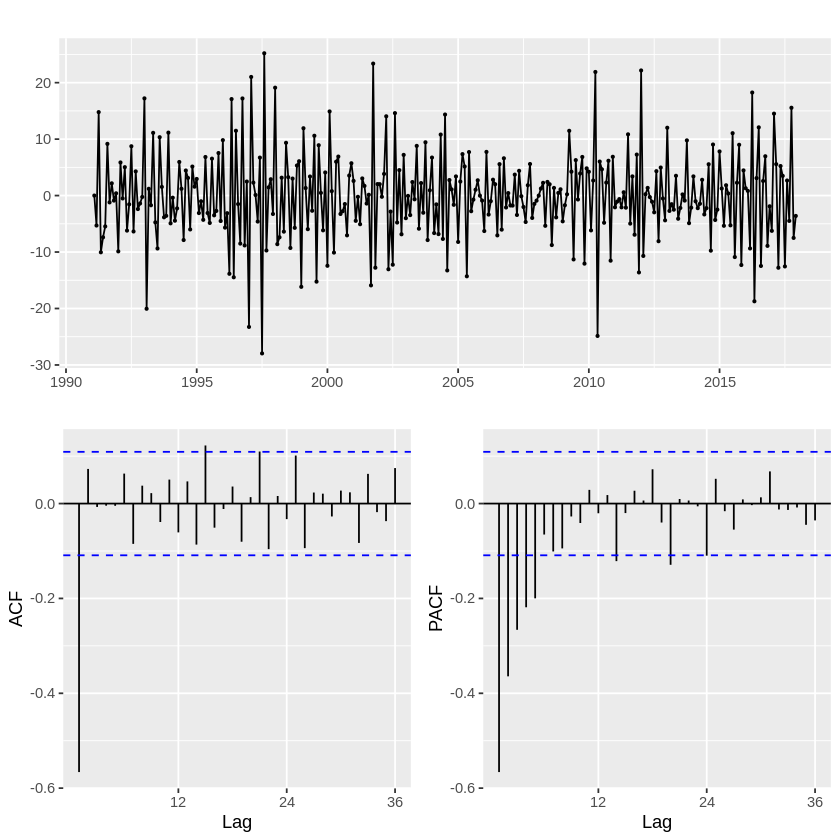

In [ ]:
a <- arima(employee_dif,order=c(0,1,0),seasonal=c(0,0,1))
ggtsdisplay(residuals(a))

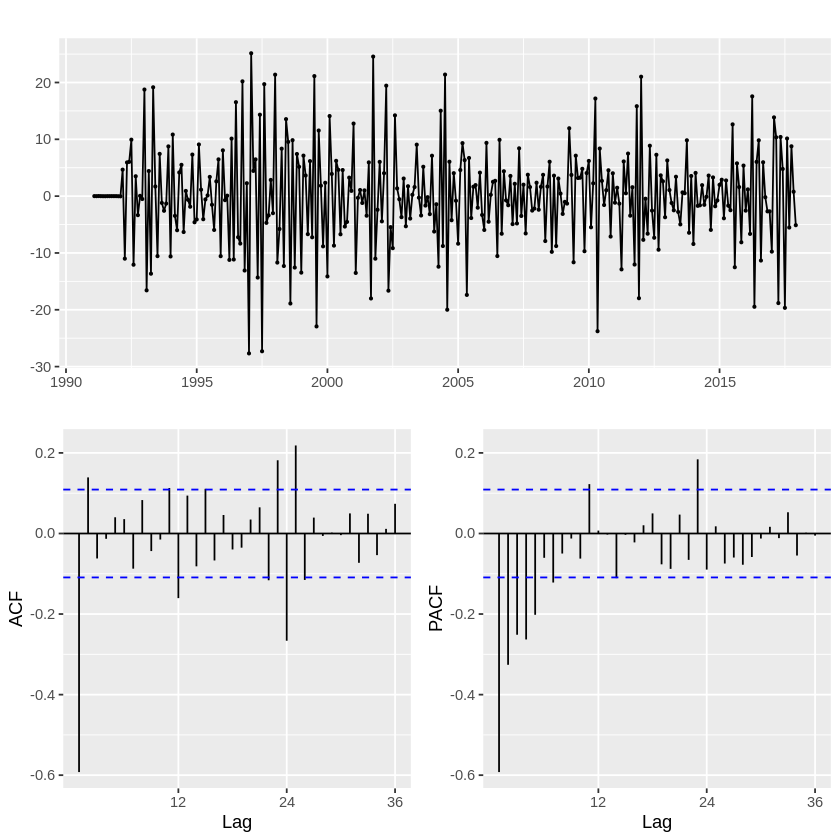

In [ ]:
a <- arima(employee_dif,order=c(0,1,0),seasonal=c(1,1,1))
ggtsdisplay(residuals(a))

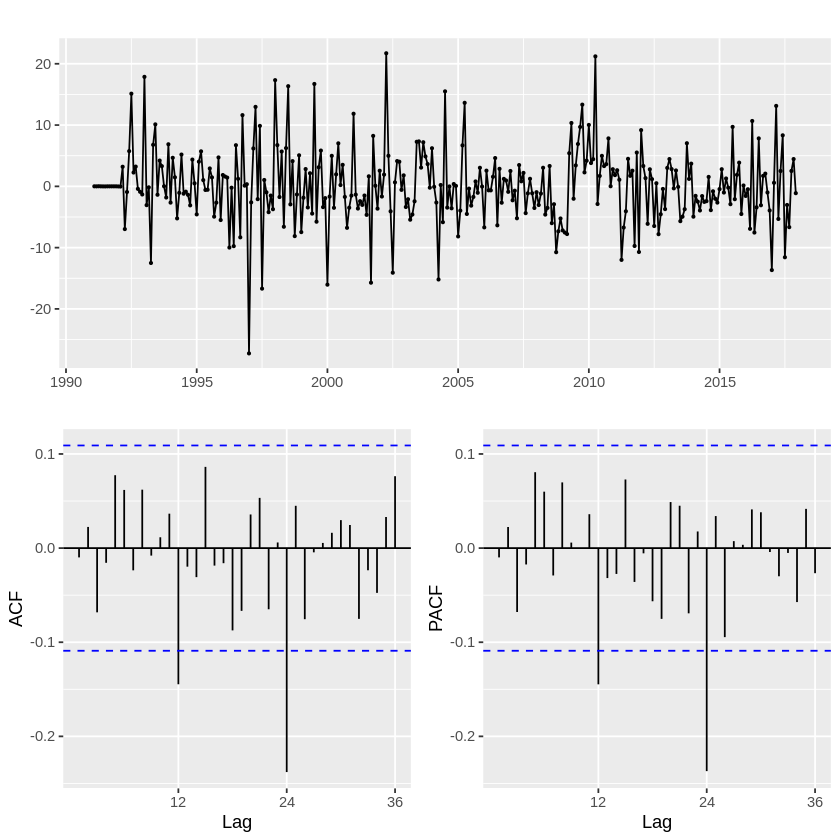

In [ ]:
a <- arima(employee_dif,order=c(0,1,2),seasonal=c(1,1,1))
ggtsdisplay(residuals(a))

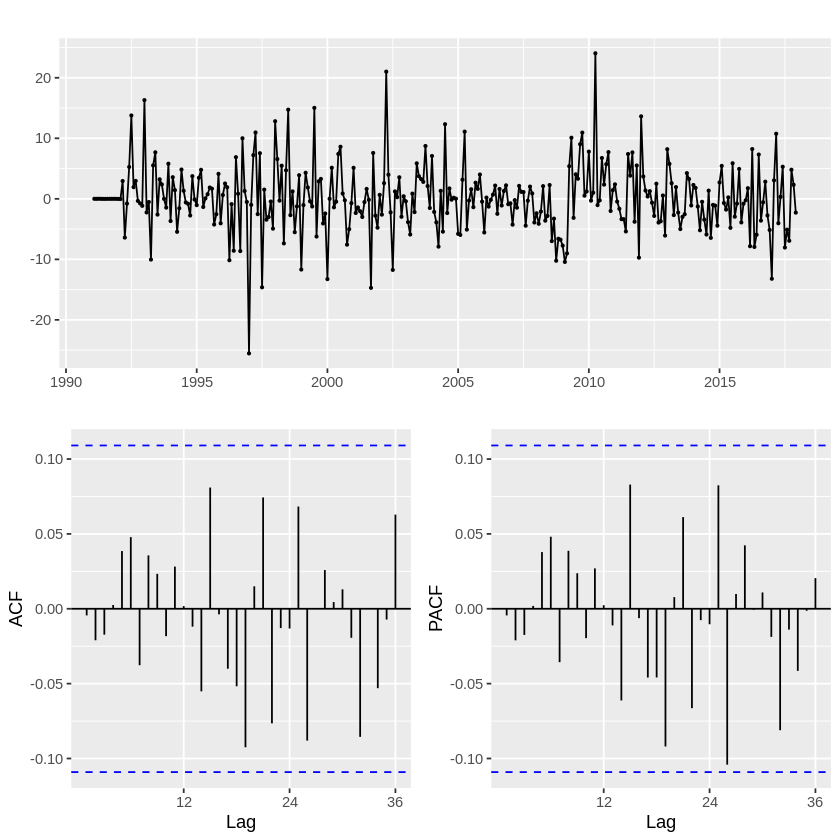

In [ ]:
a <- arima(employee_dif,order=c(0,1,2),seasonal=c(1,1,2))
ggtsdisplay(residuals(a))

In [ ]:
#Model
model <- arima(employee_dif,order=c(0,1,2),seasonal=c(1,1,2))


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(1,1,2)[12]
Q* = 14.86, df = 19, p-value = 0.7314

Model df: 5.   Total lags used: 24



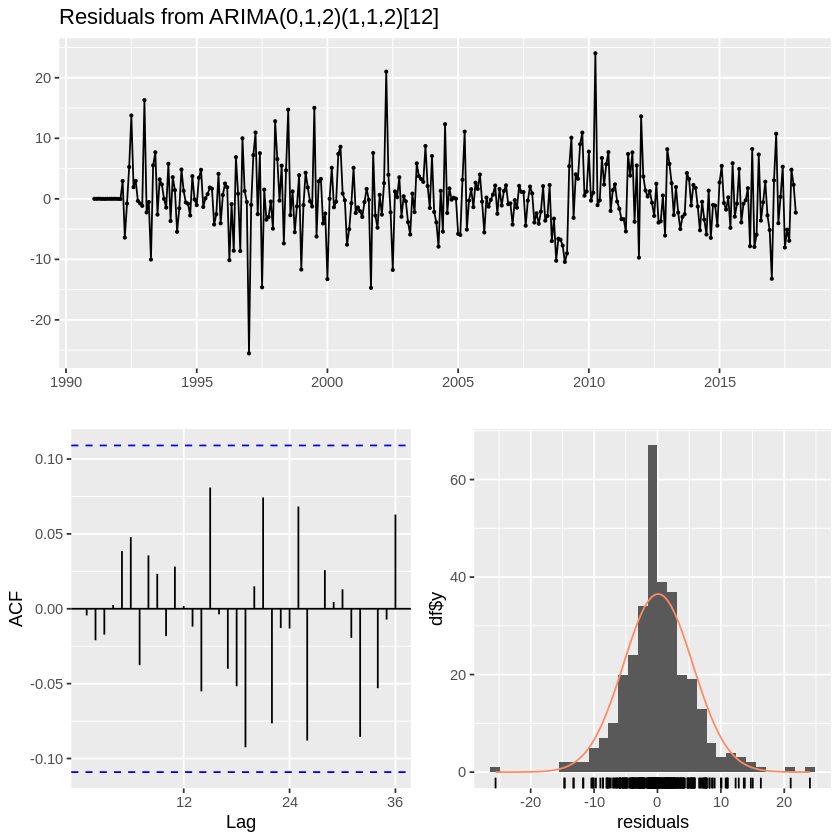

In [ ]:
checkresiduals(model)

In [ ]:
coeftest(model)


z test of coefficients:

      Estimate Std. Error  z value  Pr(>|z|)    
ma1  -1.007227   0.058096 -17.3373 < 2.2e-16 ***
ma2   0.155530   0.058500   2.6586  0.007846 ** 
sar1 -0.068760   0.083415  -0.8243  0.409761    
sma1 -1.689267   0.068133 -24.7935 < 2.2e-16 ***
sma2  0.718030   0.069389  10.3479 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
summary(forecast(model,h=12))


Forecast method: ARIMA(0,1,2)(1,1,2)[12]

Model Information:

Call:
arima(x = employee_dif, order = c(0, 1, 2), seasonal = c(1, 1, 2))

Coefficients:
          ma1     ma2     sar1     sma1    sma2
      -1.0072  0.1555  -0.0688  -1.6893  0.7180
s.e.   0.0581  0.0585   0.0834   0.0681  0.0694

sigma^2 estimated as 31.07:  log likelihood = -1003.89,  aic = 2019.78

Error measures:
                   ME     RMSE      MAE  MPE MAPE      MASE         ACF1
Training set 0.102667 5.460686 3.864368 -Inf  Inf 0.4622913 -0.004408641

Forecasts:
         Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Jan 2018       8.494522   1.348802 15.640243  -2.433914 19.422959
Feb 2018      -3.855407 -11.000813  3.289998 -14.783362  7.072548
Mar 2018      -9.015977 -16.239522 -1.792431 -20.063437  2.031483
Apr 2018       3.725478  -3.575372 11.026328  -7.440209 14.891164
May 2018      -2.554299  -9.931643  4.823045 -13.836973  8.728375
Jun 2018      -5.887817 -13.340870  1.565236 -17.286278  5.510

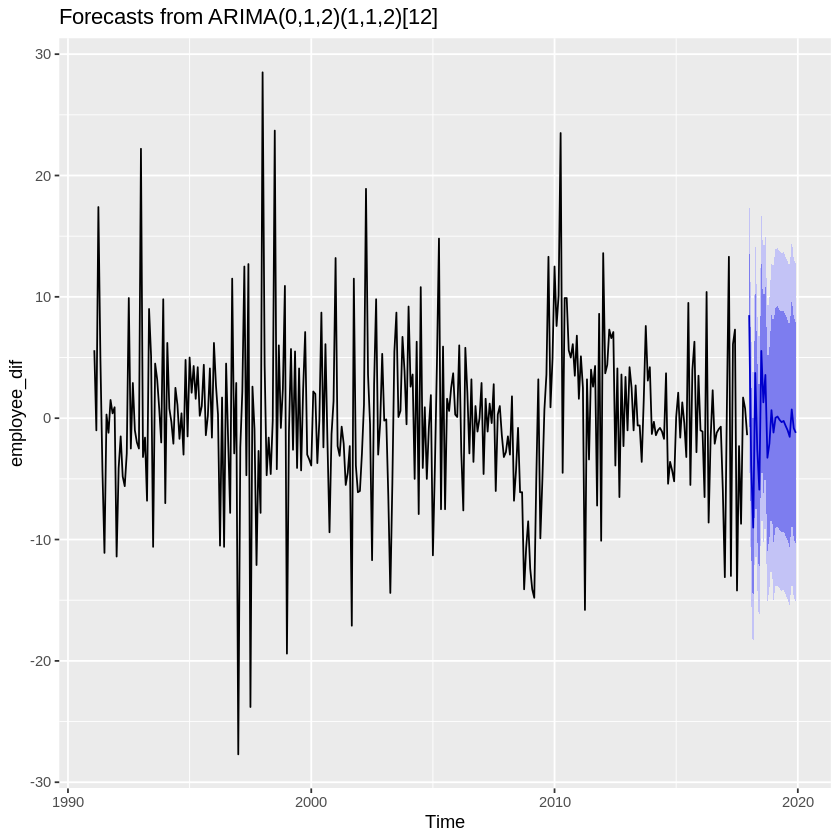

In [ ]:
autoplot(forecast(model),h=12)

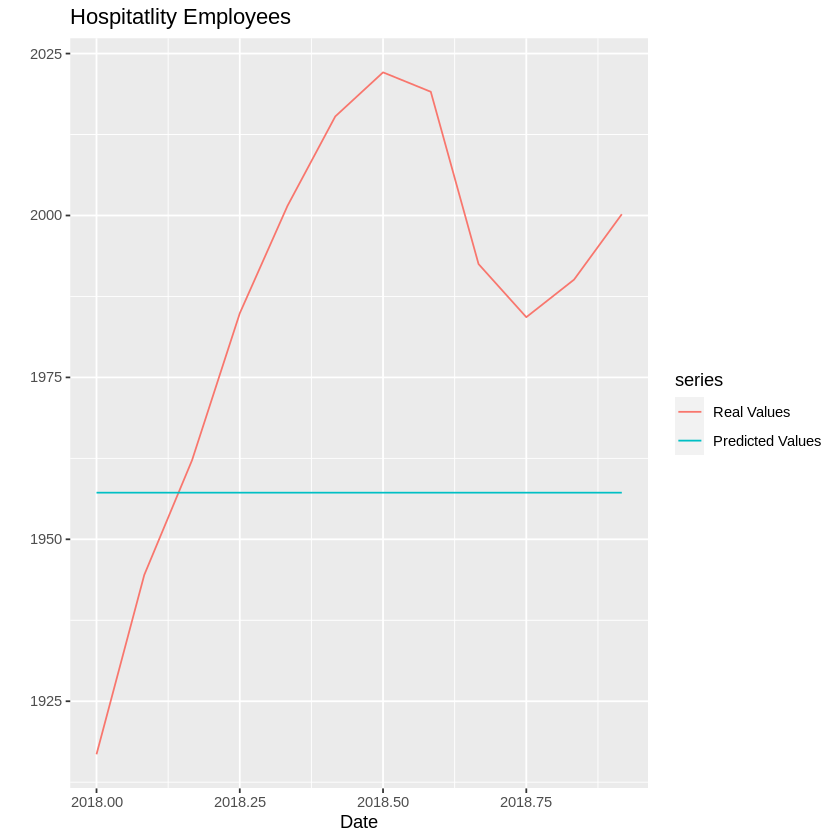

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (employee_ses, h = 12)$mean) %>%
  autoplot() + xlab ("Date") + ylab ("") + ggtitle("Hospitatlity Employees")

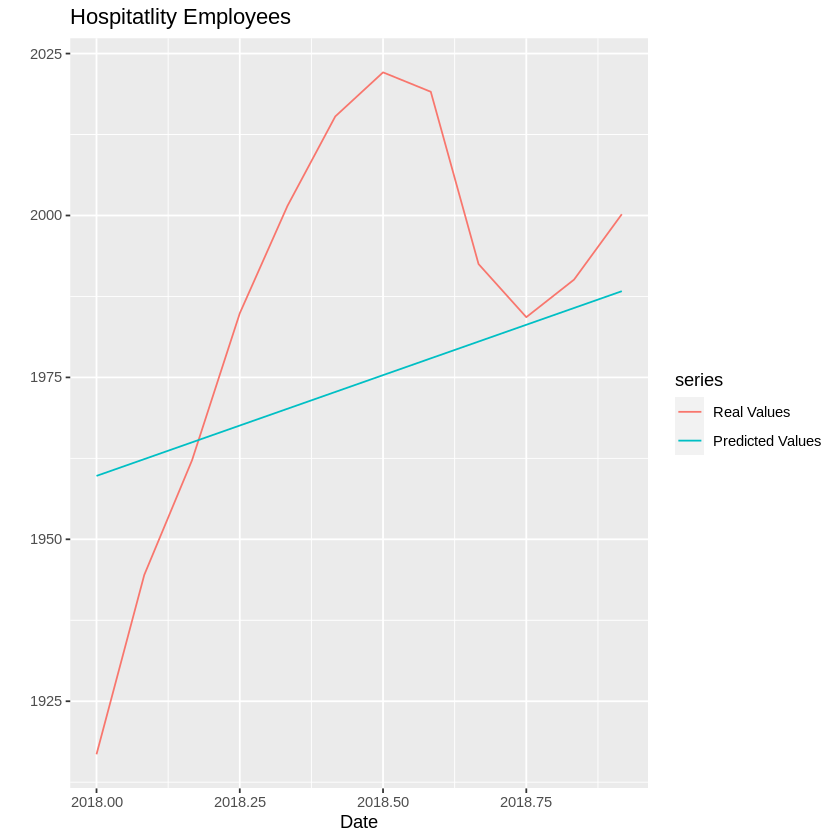

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (employees_sh, h = 12)$mean) %>%
  autoplot() + xlab ("Date") + ylab ("") + ggtitle("Hospitatlity Employees")

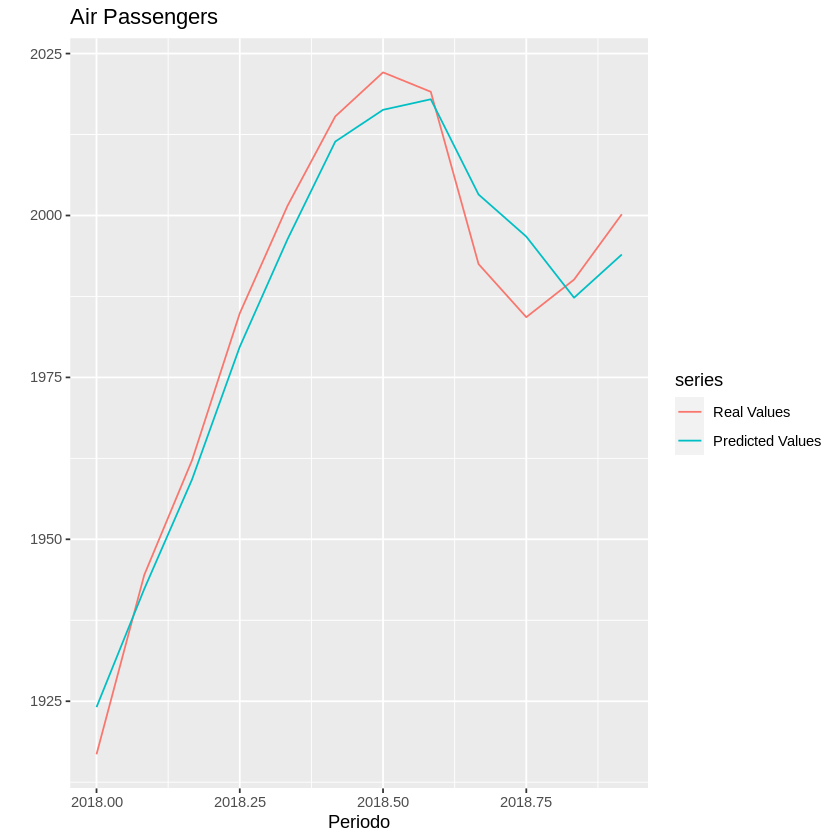

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (employees_hw, h = 12)$mean) %>%
  autoplot() + xlab ("Date") + ylab ("") + ggtitle("Hospitatlity Employees")

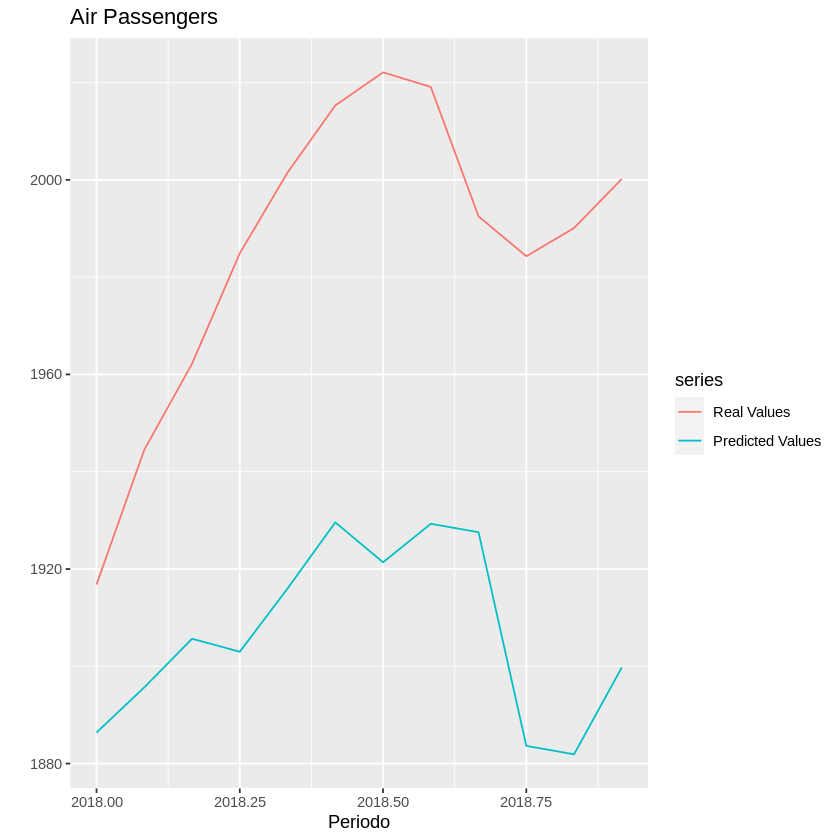

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (train_data,model = model ,h = 12)$mean) %>%
  autoplot() + xlab ("Date") + ylab ("") + ggtitle("Hospitatlity Employees")